## Singapore International Arrival by Country/Region

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
visit = pd.read_csv("visit.csv")

In [4]:
visit.head(30)

,DataSeries,2024Dec,2024Nov,2024Oct,2024Sep,2024Aug,2024Jul,2024Jun,2024May,2024Apr,...,1978Oct,1978Sep,1978Aug,1978Jul,1978Jun,1978May,1978Apr,1978Mar,1978Feb,1978Jan
0,Total International Visitor Arrivals By Inboun...,1357350,1340913,1366327,1377442,1439980,1358291,1278721,1321362,1302674,...,176680,174824,180742,164670,159663,169171,167145,166738,163368,165671
1,Southeast Asia,469730,471031,451703,448039,415024,414700,424112,425184,444629,...,72076,71751,88374,68591,65715,70058,71323,69002,69543,70278
2,Hong Kong SAR,22667,29421,30077,30211,29884,21758,27183,25416,22875,...,4466,4311,4502,4362,4411,4177,3085,5200,4005,4197
3,Taiwan,32223,32573,29422,32134,35402,36616,34239,31805,30190,...,3008,2840,2841,2080,2717,2230,2418,1974,1439,2651
4,Japan,46086,39159,53093,51355,58348,56043,43276,49708,42564,...,18968,14614,17325,16720,15825,16811,16938,17456,17889,16714
5,India,109636,96215,101824,97073,99579,89468,93055,104531,101792,...,5484,5527,5144,4719,4625,4250,3431,4103,3911,3358
6,Pakistan,1951,1546,1405,1489,1290,1454,1458,1584,1913,...,727,631,695,691,682,682,706,659,667,625
7,Sri Lanka,5888,5026,4929,4980,5068,5356,5540,5836,4505,...,995,915,944,939,903,898,906,819,833,832
8,Americas,76195,83478,80729,76930,77562,74711,74119,74642,77767,...,13642,12407,12059,13114,13367,15875,14146,11625,10800,11828
9,Canada,12693,13653,13842,11883,11781,12227,11706,10714,12617,...,1497,1721,1376,1608,1491,2030,1558,1433,1278,1228


In [9]:
new_visit = visit.copy()
new_visit = new_visit.drop(0)
new_visit.head()

,DataSeries,2024Dec,2024Nov,2024Oct,2024Sep,2024Aug,2024Jul,2024Jun,2024May,2024Apr,...,1978Oct,1978Sep,1978Aug,1978Jul,1978Jun,1978May,1978Apr,1978Mar,1978Feb,1978Jan
1,Southeast Asia,469730,471031,451703,448039,415024,414700,424112,425184,444629,...,72076,71751,88374,68591,65715,70058,71323,69002,69543,70278
2,Hong Kong SAR,22667,29421,30077,30211,29884,21758,27183,25416,22875,...,4466,4311,4502,4362,4411,4177,3085,5200,4005,4197
3,Taiwan,32223,32573,29422,32134,35402,36616,34239,31805,30190,...,3008,2840,2841,2080,2717,2230,2418,1974,1439,2651
4,Japan,46086,39159,53093,51355,58348,56043,43276,49708,42564,...,18968,14614,17325,16720,15825,16811,16938,17456,17889,16714
5,India,109636,96215,101824,97073,99579,89468,93055,104531,101792,...,5484,5527,5144,4719,4625,4250,3431,4103,3911,3358


In [34]:
# Get the column indices
start_idx = new_visit.columns.get_loc("2024Jun")
end_idx = new_visit.columns.get_loc("2024Jan")

selected_df = new_visit.iloc[:, start_idx:end_idx + 1]

# Add the DataSeries column back
selected_df.insert(0, 'DataSeries', new_visit['DataSeries'])

print("\nSelected columns using slicing (June 2023 to October 2023):")
to_graph = selected_df[1:4]
print(to_graph)


Selected columns using slicing (June 2023 to October 2023):
          DataSeries  2024Jun  2024May  2024Apr  2024Mar  2024Feb  2024Jan
2      Hong Kong SAR    27183    25416    22875    40061    22230    36048
3             Taiwan    34239    31805    30190    36153    35769    33972
4              Japan    43276    49708    42564    41659    47423    41357


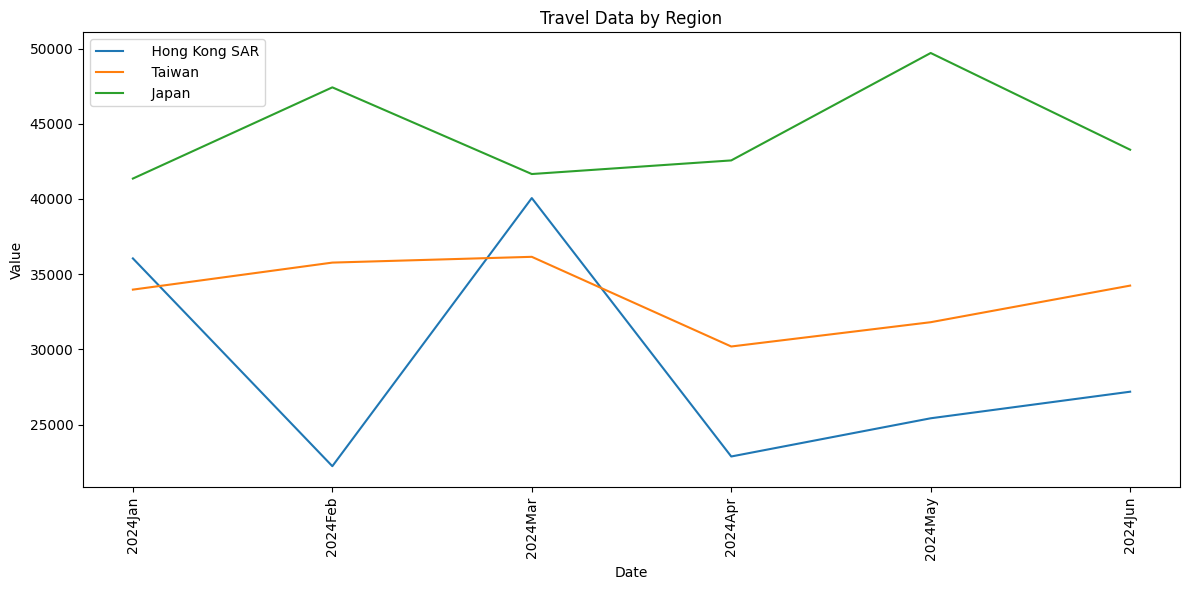

In [35]:
x = to_graph.columns[1:]  # Skip the 'DataSeries' column for x-axis
regions = to_graph['DataSeries']

plt.figure(figsize=(12, 6))

# Plot each region's data
for i in range(len(to_graph)):
    y = to_graph.iloc[i, 1:]  # Data for one region
    plt.plot(x, y, label=regions.iloc[i])

# Customize the plot
plt.title("Travel Data by Region")
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=90)

plt.gca().invert_xaxis()

plt.legend()
plt.tight_layout()
plt.show()

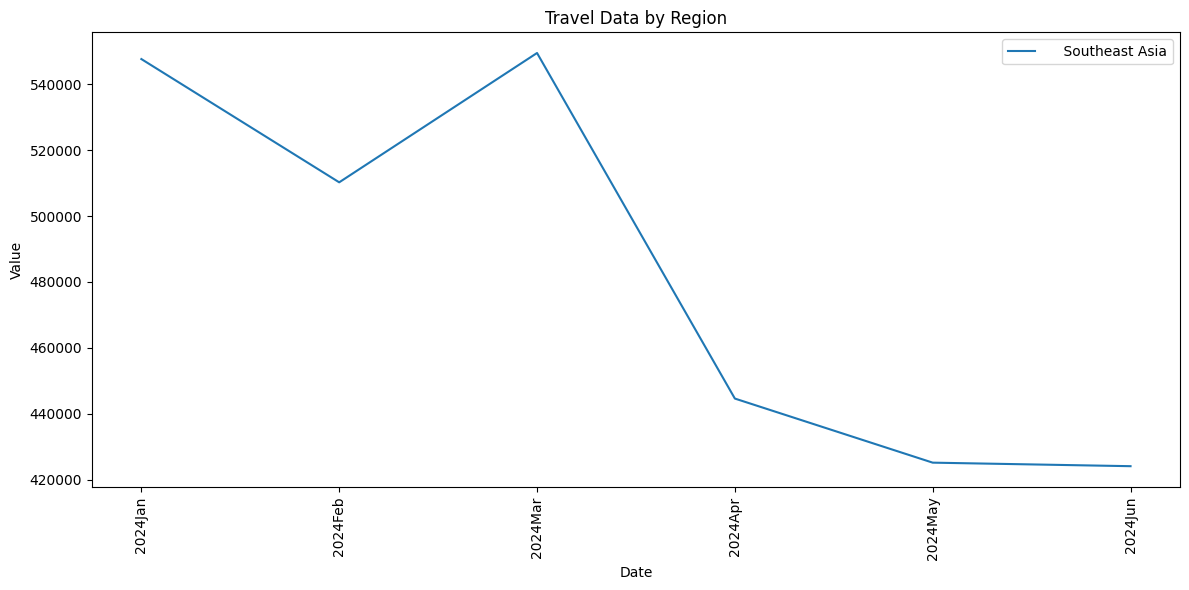

In [32]:
x = to_graph.columns[1:]  # Skip the 'DataSeries' column for x-axis
regions = to_graph['DataSeries']

plt.figure(figsize=(12, 6))

# Plot each region's data
for i in range(len(to_graph)):
    y = to_graph.iloc[i, 1:]  # Data for one region
    plt.plot(x, y, label=regions.iloc[i])

# Customize the plot
plt.title("Travel Data by Region")
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=90)

plt.gca().invert_xaxis()

plt.legend()
plt.tight_layout()
plt.show()